# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 24 Machine Learning (I)

In the previous lecture, we have learned the basic idea of machine learning and a naive example of classification. As usual, we don't need to program from the scratch if we want to work on a real problem. [Scikit-learn](http://scikit-learn.org/stable/) is a python based open source library for machine learning. It provides common interface, and many convenient tools for debugs and tests to help the users try different algorithms. In this lecture, we will continue to study the classification with the help of Scikit-Learn.

## 24.1 Classification in scikit-learn
In scikit-learn, there are three important tools.
- 1, Estimator: ML model for different purposes such as classification, clustering and regression.
- 2, Transformer: data process
- 3, Pipline: A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.

We will mainly talk about the use of estimator in this lecture.


## 24.2 Examples 
Let's continue to use the [Iris flower set](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate the concept of ML practice. Scikit has a number of classification algorithms, they are packaged as different estimator.
To use them, one could just invoke the following command.

```python
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
```

Here let just focus on one of the simplest algorithm, the _Nearest Neighbors_. The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. __That is to say, if two points have close distance, they are more likely to belong to the same class.__ The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Recall we once mentioned different types of distances in [lecture 8](https://github.com/qzhu2017/2017-cmp/blob/master/Lec_08.ipynb). Now let's try to apply the _Nearest Neighbors_ method on the Iris flower set.

### 24.2.1 Load the data


In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
Y = dataset.target

### 24.2.2 Split the data

In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10)


/Users/qiangzhu/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 24.2.3 Choose the estimator
We will use the _Nearest Neighbors_ algorithm for this case. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

### 24.2.4 fit and predict
In each estimator, there are two main modules.


- 1, fit(): to use the training data set to build the ML model
    - input: training data set
    - return: ML model with trained parameters
    
    
- 2, predict(): to use the test data set to validate the ML model
    - input: test dataset
    - return: the predicted ML values

In [4]:
import numpy as np

estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test)

#test the accuracy
accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 97.4%


As you can see, here we can achive very decent accuracy with only a couple of lines of code.
But one has too keep in mind that better results could only be obtained by understanding the algorithm 
and the nature of your data set. There are a lot of parameters for any algorithm. Try to play with them!

## 24.3 Cross Vaildation

In [5]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 98.7%


## 24.4 Parameters

It is always important to understand the parameters when you call the function.
For Kneighbors algorithm, see the documentation below,

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
avg_scores = []
all_scores = []
parameters = list(range(1,20))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier()
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

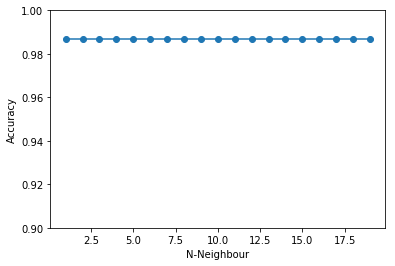

In [7]:
import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0.9,1.0])

plt.show()

## 24.5 Homework

Choose a dataset from [UC Irvine Machine Learning Repository!](http://archive.ics.uci.edu/ml/index.php) and apply the Kneighbour algorithm to do classification.